In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional,BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import datetime

In [2]:
recommandation_df = pd.read_csv('superbigdata.csv').sort_values(by=['time'])
# recommandation_df = pd.read_csv('data2.csv')

In [3]:
def convertToTimemillis(date):
    try:
        d = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S").strftime('%s.%f')
        return int(float(d)*1000)
    except:
        pass
    return 0
    

In [4]:
levels = []

MIN_CONTENTS_ON_USER = 800 

levels.append([0, MIN_CONTENTS_ON_USER+1])

contentLevels = recommandation_df['Content'].values
for contentLevel in contentLevels:
    add = True
    indexLevel = 0
    for key, level in levels:
        if contentLevel == key:
            add = False
            levels[indexLevel] = ([key, level+1])
            break
        else:
            indexLevel+=1
    if add:
        levels.append([contentLevel, 1])

classContents = []
for key, level in levels:
    if level > MIN_CONTENTS_ON_USER:
        classContents.append(key)
        
sortedClassContents = sorted(classContents)
lenSortedClassContents = len(sortedClassContents)
print(sortedClassContents)
print(lenSortedClassContents)

[0, 162, 202, 700, 781, 824, 883, 964, 1193, 1433, 1506, 1512, 1567, 1599, 1619, 1756, 1777, 1790, 1795, 1819, 1833, 1836, 1855, 1876, 1877, 1879, 1910, 1912]
28


In [5]:
MAX_DAYS = 7
def checkingTimeDifferent(nowDate, beforeDate):
    now = convertToTimemillis(nowDate)
    before = convertToTimemillis(beforeDate)
    return (now - before) >  (MAX_DAYS * 86400000)
    

In [6]:
MAX_SEQUENCE = 4
def buildFeature(paramsContents):
    feature = []
    for ignore in range(MAX_SEQUENCE-len(paramsContents)):
        feature.append(0)
    for content in paramsContents:
        feature.append(sortedClassContents.index(content))
        
    return feature
    

In [7]:
def checkConsists(item, contents):
    next = False
    for content in contents:
        if(content == item):
            next = True
    return next

In [8]:
visitors_df = recommandation_df['visitor'].drop_duplicates()
maxItem = recommandation_df['Content'].max()
training_data = []
for index, item in visitors_df.iteritems():
    video = recommandation_df[recommandation_df['visitor'] == item]
    if video.size > 1:
        tempContents = []
        indexContent = 0
        for index, item in video['Content'].iteritems():
            if(item not in sortedClassContents):
                continue
            if len(tempContents) > MAX_SEQUENCE: 
                tempContents = tempContents[1:]
                print("max sequence ", tempContents)
                continue
            if(checkConsists(item, tempContents)):
                continue
            if len(tempContents) > 0:
                nowDate = video['time'].iloc[indexContent]
                beforeDate = video['time'].iloc[indexContent-1]
                
                if checkingTimeDifferent(nowDate, beforeDate):
                    tempContents = []
                else:
                    feature = buildFeature(tempContents)
                    label = sortedClassContents.index(item)
                    training_data.append([[feature], label])
                    print("feature",feature)
                    print("label", label)
            tempContents.append(item)
            indexContent += 1
    print("-------------------")
print("training size: ", len(training_data))
    


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 7]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
feature [0, 0, 0, 23]
label 24
feature [0, 0, 23, 24]
label 17
feature [0, 23, 24, 17]
label 26
feature [23, 24, 17, 26]
label 27
max sequence  [1877, 1790, 1910, 1912]
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 23]
label 24
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 6
-------------------
-------------------
-------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 3
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 24
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 17
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 12]
label 17
feature [0, 0, 12, 17]
label 21
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------

feature [0, 0, 0, 8]
label 6
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 16
feature [0, 0, 18, 16]
label 4
feature [0, 18, 16, 4]
label 19
feature [18, 16, 4, 19]
label 10
max sequence  [1777, 781, 1819, 1506]
feature [16, 4, 19, 10]
label 8
max sequence  [781, 1819, 1506, 1193]
feature [4, 19, 10, 8]
label 25
max sequence  [1819, 1506, 1193, 1879]
feature [19, 10, 8, 25]
label 18
max sequence  [1506, 1193, 1879, 1795]
feature [10, 8, 25, 18]
label 16
max sequence  [1193, 1879, 1795, 1777]
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 25
feature [0, 0, 24, 25]
label 18
feature [0, 24, 25, 18]
label 27
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 27
-------------------
-------------------
-------------------
---

-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 17
-------------------
-------------------
feature [0, 0, 0, 24]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 17]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------

feature [0, 0, 24, 26]
label 27
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 17
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 2
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 20
feature [0, 0, 18, 20]
label 8
feature [0, 18, 20, 8]
label 16
feature [18, 20, 8, 16]
label 3
max sequence  [1833, 1193, 1777, 700]
feature [20, 8, 16, 3]
label 1
max sequence  [1193, 1777, 700, 162]
feature [8, 16, 3, 1]
label 10
max sequence  [1777, 700, 162, 1506]
feature [16, 3, 1, 10]
label 25
max sequence  [700, 162, 1506, 1879]
feature [3, 1, 10, 25]
label 4
max sequence  [162, 1506, 1879, 781]
feature [1, 10, 25, 4]
label 19
max sequence  [1506, 1879, 781, 1819]
feature [10, 25, 4, 19]
label 15
max sequence  [1879, 781, 1819, 1756]
feature [25, 4, 19, 15]
label 13
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 21
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 27
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 16]
label 10
-------------------
-------------------
-------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 24
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 7
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 23
feature [0, 0, 24, 23]
label 27
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
--------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 5
feature [0, 0, 10, 5]
label 11
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 7
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 18
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 5
feature [0, 0, 24, 5]
label 26
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 16
feature [0, 0, 10, 16]
label 24
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 26
feature [0, 0, 24, 26]
label 27
-------------------
-------------------
--------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 25
feature [0, 0, 10, 25]
label 13
feature [0, 10, 25, 13]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 16]
label 4
feature [0, 0, 16, 4]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 26
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 19]
label 27
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 19]
label 4
-------------------
-------------------
feature [0, 0, 0, 1]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 16
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 13
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 23
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 26
feature [0, 0, 24, 26]
label 27
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
--------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 17]
label 6
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 14
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 26
feature [0, 0, 18, 26]
label 27
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 16]
label 26
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 26
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 6]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 16]
label 25
-------------------
feature [0, 0, 0, 22]
label 21
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 13
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 16]
label 27
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------------

-------------------
-------------------
feature [0, 0, 0, 25]
label 5
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 2
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 24
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
feature [0, 0, 0, 12]
label 5
-------------------
-------------------
-------------------
feature [0, 0, 0, 7]
label 18
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 17]
label 6
-------------------
-------------------
feature [0, 0, 0, 24]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 23]
label 24
-------------------
-------------------
-------------------
--------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 7
-------------------
-------------------
feature [0, 0, 0, 18]
label 10
-------------------
feature [0, 0, 0, 10]
label 19
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 18
feature [0, 0, 25, 18]
label 16
feature [0, 25, 18, 16]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 19
feature [0, 0, 18, 19]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 19
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 16]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 23]
label 26
feature [0, 0, 23, 26]
label 27
-------------------
-------------------
-------------------
feature [0, 0, 0, 19]
label 16
feature [0, 0, 19, 16]
label 18
feature [0, 19, 16, 18]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 2
-------------------
-------------------
-------------------
-------------------
-------------------
-

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 16
feature [0, 0, 18, 16]
label 25
feature [0, 18, 16, 25]
label 19
-------------------
-------------------
----

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 17
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 26
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

feature [0, 0, 0, 15]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 15
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
--------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


feature [0, 0, 0, 25]
label 8
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 5]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 19
feature [0, 0, 18, 19]
label 16
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 18
feature [0, 0, 13, 18]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 16
-------------------
-------------------
-------------------
-------------------
---

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 16]
label 18
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 4
-------------------
-------------------
feature [0, 0, 0, 4]
label 18
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 23
feature [0, 0, 24, 23]
label 25
feature [0, 24, 23, 25]
label 27
feature [24, 23, 25, 27]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 23]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 12]
label 7
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 8]
label 17
feature [0, 0, 8, 17]
label 21
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
--------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 8]
label 18
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 8]
label 21
-------------------
-------------------
feature [0, 0, 0, 23]
label 24
feature [0, 0, 23, 24]
label 27
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------

-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 17]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 26
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 8]
label 3
feature [0, 0, 8, 3]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 17]
label 22
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 22
-------------------
-------------------
feature [0, 0, 0, 19]
label 24
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 12]
label 6
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 16
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 19]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------

-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 6
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-

-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 21
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 6]
label 21
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 19
feature [0, 0, 4, 19]
label 18
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 23
feature [0, 0, 24, 23]
label 27
feature [0, 24, 23, 27]
label 26
feature [24, 23, 27, 26]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 18
feature [0, 0, 25, 18]
label 4
feature [0, 25, 18, 4]
label 16
feature [0, 0, 0, 24]
label 26
-------------------
-------------------
-------------------
-------------------
---

feature [0, 0, 0, 19]
label 24
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 10
-------------------
feature [0, 0, 0, 18]
label 25
feature [0, 0, 18, 25]
label 10
-------------------
-------------------
-------------------
feature [0, 0, 0, 26]
label 24
feature [0, 0, 26, 24]
label 23
feature [0, 26, 24, 23]
label 27
feature [26, 24, 23, 27]
label 4
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 18
feature [0, 0, 10, 18]
label 25
feature [0, 10, 18, 25]
label 4
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
--

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 14]
label 7
feature [0, 0, 14, 7]
label 23
feature [0, 14, 7, 23]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 23
feature [0, 0, 24, 23]
label 26
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
--------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 17
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 22
-------------------
-------------------
feature [0, 0, 0, 25]
label 19
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 22
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 25
feature [0, 0, 4, 25]
label 1
-------------------
-------------------
-------------------
-------------------
----------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 16
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 1]
label 15
feature [0, 0, 1, 15]
label 21
-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 26
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------------

-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 15
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 24
feature [0, 0, 25, 24]
label 23
feature [0, 25, 24, 23]
label 26
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 21
-------------------
-------------------
------------

-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 17
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 24
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 7]
label 1
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 2
-------------------
feature [0, 0, 0, 25]
label 4
-------------------
-------------------
--

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 2]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 26]
label 27
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
--------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 14]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 16]
label 12
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 17
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
feature [0, 0, 0, 27]
label 12
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 17]
label 22
feature [0, 0, 17, 22]
label 21
-------------------
feature [0, 0, 0, 20]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 27
feature [0, 0, 25, 27]
label 16
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 22
feature [0, 0, 21, 22]
label 8
f

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 18
feature [0, 0, 25, 18]
label 16
feature [0, 25, 18, 16]
label 19
feature [25, 18, 16, 19]

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 27
-------------------
-------------------
feature [0, 0, 0, 14]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 22
feature [0, 0, 21, 22]
label 8
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
feature [0, 0, 0, 24]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 7
feature [0, 0, 25, 7]
label 11
feature [0, 25, 7, 11]
label 18
-------------------
-------------------
-------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 13
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 17]
label 21
feature [0, 0, 17, 21]
label 22
-------------------
-------------------
------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 6]
label 3
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 13
feature [0, 0, 4, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 12]
label 18
feature [0, 0, 12, 18]
label 27
-------------------
-------

-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 25
feature [0, 0, 18, 25]
label 16
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 12]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 25
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 23]
label 24
feature [0, 0, 23, 24]
label 26
feature [0, 23, 24, 26]
label 27
feature [23, 24, 26, 27]
label 19
max sequence  [1877, 1910, 1912, 1819]
feature [24, 26, 27, 19]
label 14
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label

-------------------
-------------------
feature [0, 0, 0, 21]
label 17
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 10
feature [0, 0, 24, 10]
label 26
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 14]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 14
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 8
-------------------
-------------------
-------------------
-------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 16
feature [0, 0, 25, 16]
label 19
feature [0, 25, 16, 19]
label 27
-------------------
-------------------
-------------------
----

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 21
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 17
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 21
feature [0, 0, 20, 21]
label 15
feature [0, 20, 21, 15]
label 6
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 24
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 14
feature [0, 0, 20, 14]
label 6
feature [0, 20, 14, 6]
label 22
feature [20, 14, 6, 22]
label 2
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feat

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 17]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4
-------------------
feature [0, 0, 0, 22]
label 21
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
feature [0, 0, 0, 1]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 7]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 15
feature [0, 0, 21, 15]
label 26
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 27]
label 19
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 3
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 3
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 21
-------------------
feature [0, 0, 0, 19]
label 1
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
--------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 24]
label 27
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 16
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 18
feature [0, 0, 25, 18]
label 16
feature [0, 25, 18, 16]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-----------

-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 14]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 26]
label 27
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 17
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 13
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 8]
label 21
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 18

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 26]
label 25
feature [0, 0, 26, 25]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 16
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 26]
label 24
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 22
feature [0, 0, 9, 22]
label 1
feature [0, 9, 22, 1]
label 8
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 12]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 27]
label 2
-------------------
-------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 18
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 5
-------------------
-------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 23]
label 24
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 13
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
feature [0, 0, 0, 4]
label 9
feature [0, 0, 4, 9]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------

-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 16]
label 10
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 12
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 27]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 26]
label 27
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 25
feature [0, 0, 18, 25]
label 5
feature [0, 18, 25, 5]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
--------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 21
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 6
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 26]
label 27
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 5]
label 18
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 14
-------------------
-------------------
-------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 15
feature [0, 0, 21, 15]
label 17
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 2
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 14


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 27]
label 26
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 1]
label 6
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 2
-------------------
-------------------
-------------------
-------------------
-------------------
-

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 12]
label 21
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 6
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 22
feature [0, 0, 21, 22]
label 17
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 3
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 12]
label 19
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 2]
label 25
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 19]
label 14
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 10
feature [0, 0, 4, 10]
label 18
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 1]
label 8
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 17
feature [0, 0, 21, 17]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 16
-------------------
-------------------
-------------------
------

-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 2]
label 18
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 27
feature [0, 0, 4, 27]
label 18
feature [0, 4, 27, 18]
label 23
-------------------
-------------------
-------------------
-------------------
-------

-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 3
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
feature [0, 0, 0, 18]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 26]
label 23
feature [0, 0, 26, 23]
label 22
feature [0, 26, 23, 22]
label 14
feature [26, 23, 22, 14]
label 12
max sequence  [1876, 1855, 1619, 1567]
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 17]
label 2
-------------------
-------------------
-------------------
-------------------
-

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 27]
label 23
-------------------
feature [0, 0, 0, 10]
label 13
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 3
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 15
-------------------
-------------------
---------

feature [0, 0, 0, 5]
label 8
-------------------
-------------------
-------------------
feature [0, 0, 0, 27]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 20
feature [0, 0, 3, 20]
label 14
feature [0, 3, 20, 14]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------

-------------------
feature [0, 0, 0, 9]
label 4
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 18
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 1]
label 21
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
feature [0, 0, 0, 16]
label 19
feature [0, 0, 16, 19]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 6
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
--------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 15
feature [0, 0, 22, 15]
label 17
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 2]
label 3
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 26]
label 24
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 14]
label 10
feature [0, 0, 14, 10]
label 13
feature [0, 14, 10, 13]
label 25
feature [14, 10, 13, 25]
label 4
max sequence  [1506, 1599, 1879, 781]
-------------------
-------------------
-------------------
--

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 26]
label 24
feature [0, 0, 26, 24]
label 27
feature [0, 26, 24, 27]
label 23
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 12
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
--------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 18
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 21
-------------------
feature [0, 0, 0, 25]
label 3
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------

-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 3
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 26
feature [0, 0, 10, 26]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 22]
label 17
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 18
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 17
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 26]
label 27
-------------------
feature [0, 0, 0, 23]
label 8
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 26
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 14]
label 25
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 3
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 18
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 14]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 6]
label 1
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 2]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 13
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 6]
label 1


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

feature [0, 0, 0, 10]
label 13
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
feature [0, 0, 0, 25]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 15
-------------------
feature [0, 0, 0, 10]
label 19
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 13
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 3
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 13]
label 10
-------------------
-------------------
-------------------
--------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 20]
label 14
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 18]
label 4
feature [0, 0, 18, 4]
label 9
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 12]
label 8
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 13
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 10
feature [0, 0, 4, 10]

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


feature [0, 0, 0, 10]
label 18
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 3
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 18
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

feature [0, 0, 0, 4]
label 13
feature [0, 0, 4, 13]
label 9
feature [0, 4, 13, 9]
label 10
feature [4, 13, 9, 10]
label 14
max sequence  [1599, 1433, 1506, 1619]
feature [13, 9, 10, 14]
label 18
max sequence  [1433, 1506, 1619, 1795]
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 19]
label 8
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 15]
label 17
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 21]
label 15
feature [0, 0, 21, 15]
label 20
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 25]
label 12
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 3]
label 15
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
feature [0, 0, 0, 10]
label 18
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 18
feature [0, 0, 10, 18]
label 25
-------------------
------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 26]
label 27
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 10]
label 7
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 4]
label 3
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 17]
label 22
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
---------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 5]
label 25
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
feature [0, 0, 0, 9]
label 4
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-----------

-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------
-------------------


In [9]:
import random

random.shuffle(training_data)

In [10]:
features = []
labels = []
for feature, label in training_data:
    features.append(feature)
    labels.append(label)
    print("feature : ", feature)
    print("label : ", label)
    print("--------")
print("features size : ", len(features))
print("labels size : ", len(labels))

feature :  [[0, 0, 20, 19]]
label :  14
--------
feature :  [[0, 0, 0, 24]]
label :  27
--------
feature :  [[0, 0, 0, 20]]
label :  3
--------
feature :  [[0, 0, 0, 15]]
label :  3
--------
feature :  [[0, 0, 0, 18]]
label :  21
--------
feature :  [[0, 0, 0, 10]]
label :  25
--------
feature :  [[0, 0, 0, 20]]
label :  17
--------
feature :  [[0, 0, 0, 6]]
label :  3
--------
feature :  [[0, 0, 0, 13]]
label :  10
--------
feature :  [[0, 0, 24, 22]]
label :  26
--------
feature :  [[0, 0, 0, 13]]
label :  10
--------
feature :  [[0, 0, 0, 3]]
label :  15
--------
feature :  [[0, 0, 4, 10]]
label :  7
--------
feature :  [[0, 0, 0, 13]]
label :  10
--------
feature :  [[0, 0, 0, 22]]
label :  21
--------
feature :  [[0, 0, 0, 14]]
label :  26
--------
feature :  [[0, 0, 0, 23]]
label :  25
--------
feature :  [[0, 0, 0, 22]]
label :  21
--------
feature :  [[0, 0, 0, 12]]
label :  7
--------
feature :  [[0, 0, 0, 3]]
label :  15
--------
feature :  [[0, 0, 0, 25]]
label :  22
-------

feature :  [[0, 0, 0, 21]]
label :  17
--------
feature :  [[0, 0, 0, 13]]
label :  10
--------
feature :  [[0, 10, 13, 12]]
label :  5
--------
feature :  [[0, 0, 0, 16]]
label :  8
--------
feature :  [[0, 0, 0, 18]]
label :  25
--------
feature :  [[0, 0, 0, 20]]
label :  8
--------
feature :  [[0, 0, 0, 23]]
label :  26
--------
feature :  [[0, 0, 0, 10]]
label :  18
--------
feature :  [[0, 0, 0, 3]]
label :  22
--------
feature :  [[0, 0, 0, 21]]
label :  22
--------
feature :  [[0, 0, 0, 10]]
label :  18
--------
feature :  [[0, 0, 25, 18]]
label :  12
--------
feature :  [[0, 0, 0, 26]]
label :  27
--------
feature :  [[0, 0, 0, 26]]
label :  24
--------
feature :  [[0, 0, 0, 13]]
label :  10
--------
feature :  [[0, 25, 18, 16]]
label :  19
--------
feature :  [[0, 0, 0, 25]]
label :  26
--------
feature :  [[0, 25, 18, 14]]
label :  15
--------
feature :  [[0, 0, 0, 25]]
label :  18
--------
feature :  [[0, 0, 0, 24]]
label :  23
--------
feature :  [[0, 0, 0, 13]]
label :  1

feature :  [[0, 0, 0, 4]]
label :  9
--------
feature :  [[0, 0, 0, 10]]
label :  19
--------
feature :  [[0, 0, 0, 22]]
label :  25
--------
feature :  [[0, 0, 0, 25]]
label :  24
--------
feature :  [[0, 0, 0, 18]]
label :  27
--------
feature :  [[0, 0, 0, 4]]
label :  22
--------
feature :  [[0, 0, 10, 25]]
label :  18
--------
feature :  [[0, 0, 24, 25]]
label :  26
--------
feature :  [[0, 0, 0, 21]]
label :  17
--------
feature :  [[0, 0, 3, 21]]
label :  27
--------
feature :  [[0, 0, 0, 13]]
label :  20
--------
feature :  [[0, 0, 25, 13]]
label :  9
--------
feature :  [[0, 0, 0, 20]]
label :  22
--------
feature :  [[0, 0, 0, 7]]
label :  15
--------
feature :  [[0, 0, 0, 20]]
label :  15
--------
feature :  [[0, 0, 0, 24]]
label :  8
--------
feature :  [[0, 0, 0, 24]]
label :  25
--------
feature :  [[0, 0, 0, 6]]
label :  21
--------
feature :  [[0, 0, 0, 26]]
label :  25
--------
feature :  [[0, 0, 0, 9]]
label :  25
--------
feature :  [[0, 0, 0, 18]]
label :  21
------

label :  16
--------
feature :  [[0, 0, 0, 27]]
label :  26
--------
feature :  [[0, 0, 0, 21]]
label :  17
--------
feature :  [[0, 0, 0, 4]]
label :  9
--------
feature :  [[0, 0, 26, 24]]
label :  27
--------
feature :  [[0, 0, 25, 24]]
label :  10
--------
feature :  [[0, 0, 0, 3]]
label :  22
--------
feature :  [[0, 0, 0, 10]]
label :  13
--------
feature :  [[0, 0, 0, 21]]
label :  22
--------
feature :  [[0, 0, 0, 12]]
label :  10
--------
feature :  [[0, 0, 0, 4]]
label :  25
--------
feature :  [[0, 16, 24, 18]]
label :  23
--------
feature :  [[0, 10, 15, 14]]
label :  6
--------
feature :  [[0, 0, 0, 4]]
label :  10
--------
feature :  [[0, 0, 0, 4]]
label :  10
--------
feature :  [[0, 0, 0, 10]]
label :  13
--------
feature :  [[0, 0, 5, 16]]
label :  4
--------
feature :  [[0, 0, 0, 23]]
label :  14
--------
feature :  [[0, 0, 0, 24]]
label :  25
--------
feature :  [[0, 0, 0, 11]]
label :  17
--------
feature :  [[0, 0, 25, 18]]
label :  10
--------
feature :  [[16, 7, 

feature :  [[0, 0, 0, 18]]
label :  25
--------
feature :  [[0, 0, 0, 13]]
label :  10
--------
feature :  [[0, 0, 0, 25]]
label :  10
--------
feature :  [[0, 0, 0, 4]]
label :  25
--------
feature :  [[0, 0, 0, 24]]
label :  8
--------
feature :  [[0, 0, 0, 23]]
label :  27
--------
feature :  [[0, 0, 26, 10]]
label :  4
--------
feature :  [[0, 25, 18, 10]]
label :  24
--------
feature :  [[0, 0, 0, 25]]
label :  19
--------
feature :  [[0, 0, 15, 21]]
label :  3
--------
feature :  [[0, 0, 0, 4]]
label :  18
--------
feature :  [[0, 0, 27, 24]]
label :  23
--------
feature :  [[0, 0, 0, 18]]
label :  16
--------
feature :  [[0, 0, 0, 10]]
label :  13
--------
feature :  [[0, 0, 0, 4]]
label :  9
--------
feature :  [[0, 0, 0, 3]]
label :  15
--------
feature :  [[0, 0, 25, 14]]
label :  15
--------
feature :  [[0, 0, 22, 21]]
label :  8
--------
feature :  [[0, 0, 0, 4]]
label :  18
--------
feature :  [[0, 0, 0, 27]]
label :  26
--------
feature :  [[0, 0, 0, 20]]
label :  14
----

label :  3
--------
feature :  [[0, 0, 0, 14]]
label :  20
--------
feature :  [[0, 0, 0, 13]]
label :  10
--------
feature :  [[0, 0, 14, 25]]
label :  22
--------
feature :  [[0, 0, 0, 8]]
label :  17
--------
feature :  [[0, 0, 0, 20]]
label :  15
--------
feature :  [[0, 0, 14, 26]]
label :  24
--------
feature :  [[0, 0, 0, 23]]
label :  26
--------
feature :  [[0, 0, 0, 8]]
label :  22
--------
feature :  [[0, 0, 0, 22]]
label :  18
--------
feature :  [[0, 0, 0, 20]]
label :  22
--------
feature :  [[0, 0, 21, 5]]
label :  22
--------
feature :  [[0, 0, 4, 25]]
label :  16
--------
feature :  [[0, 0, 24, 16]]
label :  25
--------
feature :  [[0, 25, 18, 16]]
label :  4
--------
feature :  [[0, 24, 25, 26]]
label :  27
--------
feature :  [[0, 0, 14, 20]]
label :  15
--------
feature :  [[0, 0, 27, 18]]
label :  23
--------
feature :  [[0, 0, 0, 24]]
label :  23
--------
feature :  [[0, 0, 24, 26]]
label :  27
--------
feature :  [[0, 0, 0, 24]]
label :  23
--------
feature :  [[

In [11]:
lenSortedClassContents = len(sortedClassContents)
print(lenSortedClassContents)

28


In [12]:
X = np.array(features)
Y = np.array(labels).astype(np.float32)
print (X)
print (Y)

[[[ 0  0 20 19]]

 [[ 0  0  0 24]]

 [[ 0  0  0 20]]

 ...

 [[ 0  0  0 10]]

 [[ 0  0  4 11]]

 [[ 0  0  0 15]]]
[14. 27.  3. ... 16. 24.  3.]


In [13]:
# print(X.shape[1:])
# print(type(X))
# print(type(Y))
model = Sequential()
model.add(LSTM(512, input_shape=(X.shape[1:]), return_sequences=True) )

model.add(LSTM(256, return_sequences=True))

model.add(LSTM(256, return_sequences=True))

model.add(LSTM(128))

model.add(Dense(256, activation='relu'))

model.add(Dense(lenSortedClassContents))
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 512)            1058816   
_________________________________________________________________
dropout (Dropout)            (None, 1, 512)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 256)            787456    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 256)            525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               1

In [14]:
# adam = Adam(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, Y, epochs=120, batch_size=16, validation_split=0.1)

Epoch 1/120
274/274 [==============================] - 4s 13ms/step - loss: 3.1590 - accuracy: 0.0797 - val_loss: 3.0620 - val_accuracy: 0.0739
Epoch 2/120
274/274 [==============================] - 3s 10ms/step - loss: 2.9962 - accuracy: 0.1226 - val_loss: 2.9777 - val_accuracy: 0.1273
Epoch 3/120
274/274 [==============================] - 3s 10ms/step - loss: 2.9245 - accuracy: 0.1479 - val_loss: 2.9194 - val_accuracy: 0.1417
Epoch 4/120
274/274 [==============================] - 3s 10ms/step - loss: 2.8691 - accuracy: 0.1682 - val_loss: 2.8178 - val_accuracy: 0.2074
Epoch 5/120
274/274 [==============================] - 3s 10ms/step - loss: 2.8362 - accuracy: 0.1796 - val_loss: 2.8012 - val_accuracy: 0.1745
Epoch 6/120
274/274 [==============================] - 3s 10ms/step - loss: 2.7838 - accuracy: 0.1977 - val_loss: 2.7937 - val_accuracy: 0.1766
Epoch 7/120
274/274 [==============================] - 3s 11ms/step - loss: 2.7419 - accuracy: 0.2159 - val_loss: 2.7788 - val_accuracy:

274/274 [==============================] - 3s 12ms/step - loss: 2.4242 - accuracy: 0.2887 - val_loss: 2.5584 - val_accuracy: 0.2772
Epoch 58/120
274/274 [==============================] - 3s 11ms/step - loss: 2.4150 - accuracy: 0.2842 - val_loss: 2.4992 - val_accuracy: 0.2998
Epoch 59/120
274/274 [==============================] - 3s 11ms/step - loss: 2.3902 - accuracy: 0.2926 - val_loss: 2.5404 - val_accuracy: 0.3080
Epoch 60/120
274/274 [==============================] - 3s 11ms/step - loss: 2.4187 - accuracy: 0.2801 - val_loss: 2.6381 - val_accuracy: 0.2916
Epoch 61/120
274/274 [==============================] - 3s 11ms/step - loss: 2.4046 - accuracy: 0.2913 - val_loss: 2.5180 - val_accuracy: 0.2957
Epoch 62/120
274/274 [==============================] - 3s 11ms/step - loss: 2.3955 - accuracy: 0.2876 - val_loss: 2.5478 - val_accuracy: 0.3039
Epoch 63/120
274/274 [==============================] - 3s 11ms/step - loss: 2.3811 - accuracy: 0.2947 - val_loss: 2.5352 - val_accuracy: 0.328

274/274 [==============================] - 3s 12ms/step - loss: 2.2607 - accuracy: 0.3241 - val_loss: 2.7498 - val_accuracy: 0.3183
Epoch 114/120
274/274 [==============================] - 3s 13ms/step - loss: 2.2375 - accuracy: 0.3328 - val_loss: 2.7417 - val_accuracy: 0.3039
Epoch 115/120
274/274 [==============================] - 3s 12ms/step - loss: 2.2445 - accuracy: 0.3376 - val_loss: 2.7050 - val_accuracy: 0.3183
Epoch 116/120
274/274 [==============================] - 3s 12ms/step - loss: 2.2182 - accuracy: 0.3360 - val_loss: 2.7471 - val_accuracy: 0.2998
Epoch 117/120
274/274 [==============================] - 3s 12ms/step - loss: 2.2214 - accuracy: 0.3376 - val_loss: 2.7032 - val_accuracy: 0.3347
Epoch 118/120
274/274 [==============================] - 3s 12ms/step - loss: 2.2206 - accuracy: 0.3349 - val_loss: 2.7599 - val_accuracy: 0.3018
Epoch 119/120
274/274 [==============================] - 3s 12ms/step - loss: 2.2259 - accuracy: 0.3330 - val_loss: 2.7741 - val_accuracy:

In [48]:
print(X)
print ("+++++++")


[[ 0  0 20 19]
 [ 0  0  0 24]
 [ 0  0  0 20]
 ...
 [ 0  0  0 10]
 [ 0  0  4 11]
 [ 0  0  0 15]]
+++++++


In [74]:
from tensorflow.keras.layers import Embedding

np.squeeze(X, axis=1)
model = Sequential()
model.add(Embedding(lenSortedClassContents, 64, input_length=MAX_SEQUENCE))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(lenSortedClassContents, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(X, Y, epochs=100, verbose=1)

Epoch 1/100
153/153 [==============================] - 0s 2ms/step - loss: 2.6223 - accuracy: 0.2646
Epoch 2/100
153/153 [==============================] - 0s 2ms/step - loss: 2.3629 - accuracy: 0.3363
Epoch 3/100
153/153 [==============================] - 0s 2ms/step - loss: 2.3025 - accuracy: 0.3474
Epoch 4/100
153/153 [==============================] - 0s 2ms/step - loss: 2.2600 - accuracy: 0.3541
Epoch 5/100
153/153 [==============================] - 0s 2ms/step - loss: 2.2225 - accuracy: 0.3585
Epoch 6/100
153/153 [==============================] - 0s 2ms/step - loss: 2.1863 - accuracy: 0.3745
Epoch 7/100
153/153 [==============================] - 0s 2ms/step - loss: 2.1538 - accuracy: 0.3809
Epoch 8/100
153/153 [==============================] - 0s 2ms/step - loss: 2.1240 - accuracy: 0.3827
Epoch 9/100
153/153 [==============================] - 0s 2ms/step - loss: 2.1005 - accuracy: 0.3901
Epoch 10/100
153/153 [==============================] - 0s 2ms/step - loss: 2.0708 - accura

153/153 [==============================] - 0s 2ms/step - loss: 1.8548 - accuracy: 0.4328
Epoch 82/100
153/153 [==============================] - 0s 2ms/step - loss: 1.8571 - accuracy: 0.4306
Epoch 83/100
153/153 [==============================] - 0s 2ms/step - loss: 1.8861 - accuracy: 0.4244
Epoch 84/100
153/153 [==============================] - 0s 3ms/step - loss: 1.9123 - accuracy: 0.4205
Epoch 85/100
153/153 [==============================] - 0s 2ms/step - loss: 1.9875 - accuracy: 0.4061
Epoch 86/100
153/153 [==============================] - 0s 2ms/step - loss: 1.9526 - accuracy: 0.4156
Epoch 87/100
153/153 [==============================] - 0s 2ms/step - loss: 1.9271 - accuracy: 0.4215
Epoch 88/100
153/153 [==============================] - 0s 2ms/step - loss: 1.9057 - accuracy: 0.4219
Epoch 89/100
153/153 [==============================] - 0s 2ms/step - loss: 1.8963 - accuracy: 0.4248
Epoch 90/100
153/153 [==============================] - 0s 2ms/step - loss: 1.8779 - accuracy: 

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

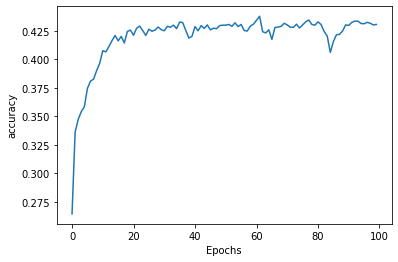

In [75]:
plot_graphs(history, 'accuracy')


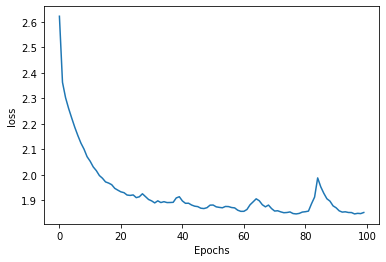

In [76]:
plot_graphs(history, 'loss')

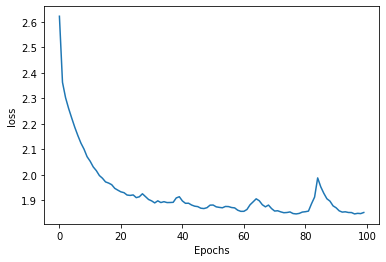

In [105]:
plot_graphs(history, 'val_loss')

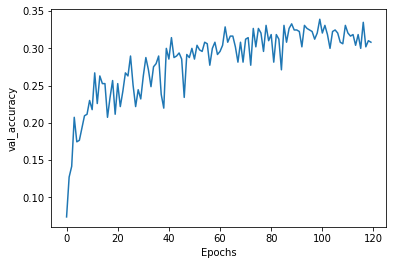

In [19]:
plot_graphs(history, 'val_accuracy')

In [177]:
predict = model.predict([[0,0, 0,sortedClassContents.index(1506)]])
print(predict)
print(np.argmax(predict[0]))
sortedClassContents[np.argmax(predict[0])]

[[6.9110300e-08 9.9900772e-04 4.2749369e-03 5.1423628e-03 9.9063933e-02
  3.9727744e-02 9.4768481e-04 1.7620038e-02 4.0161576e-02 3.4295402e-03
  9.0478099e-04 8.3317962e-03 1.0097611e-02 3.6251885e-01 1.8046763e-02
  2.0901376e-02 7.4341811e-02 5.3033099e-04 1.1122019e-01 4.8610970e-02
  2.0453362e-02 7.5904555e-03 3.2049553e-03 2.7929721e-04 1.2529337e-02
  7.1404912e-02 1.2079484e-02 5.5868393e-03]]
13


1599

In [178]:
sortedClassContents[18]

1795

In [104]:
sortedClassContents[25]

1879

In [123]:
run_model = tf.function(lambda x: model(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS = 100
INPUT_SIZE = MAX_SEQUENCE
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([1,4], model.inputs[0].dtype))

# model directory.
MODEL_DIR = "model"
model.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [147]:
# Run the model with TensorFlow to get expected results.
TEST_CASES = 10

# Run the model with TensorFlow Lite
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)
print(input_details[0]["index"])
for i in range(TEST_CASES):
  expected = model.predict([[0,0,0,i]])
  interpreter.set_tensor( input_details[0]["index"], np.array([[0,0,0,i]]).astype(np.float32))
  interpreter.invoke()
  result = interpreter.get_tensor(output_details[0]["index"])

  # Assert if the result of TFLite model is consistent with the TF model.
  np.testing.assert_almost_equal(expected, result)
  print("Done. The result of TensorFlow matches the result of TensorFlow Lite.")

  # Please note: TfLite fused Lstm kernel is stateful, so we need to reset
  # the states.
  # Clean up internal states.
  interpreter.reset_all_variables()


[{'name': 'serving_default_x:0', 'index': 0, 'shape': array([1, 4], dtype=int32), 'shape_signature': array([1, 4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 45, 'shape': array([ 1, 28], dtype=int32), 'shape_signature': array([ 1, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
0
Done. The result of TensorFlow matches the result of TensorFlow Lite.
Done. The result of TensorFlow matches the result of TensorFlow Lite.
Done. The result of TensorFlow matches the result of TensorFlow Lite.


AssertionError: 
Arrays are not almost equal to 7 decimals

Mismatched elements: 1 / 28 (3.57%)
Max absolute difference: 2.9802322e-07
Max relative difference: 2.4630244e-06
 x: array([[3.8307224e-09, 1.7557031e-02, 5.8597825e-02, 8.5234077e-04,
        1.5238276e-02, 4.7815568e-03, 5.3572629e-02, 4.2376490e-03,
        5.9290306e-04, 4.7311232e-07, 2.1090770e-04, 2.4945561e-05,...
 y: array([[3.8307135e-09, 1.7557032e-02, 5.8597855e-02, 8.5234095e-04,
        1.5238278e-02, 4.7815596e-03, 5.3572640e-02, 4.2376490e-03,
        5.9290312e-04, 4.7311349e-07, 2.1090762e-04, 2.4945577e-05,...

In [148]:
open("converted_model.tflite", "wb").write(tflite_model)

119072

In [161]:
interpreter.set_tensor( input_details[0]["index"], np.array([[0,0,0,sortedClassContents.index(700)]]).astype(np.float32))
interpreter.invoke()
result = interpreter.get_tensor(output_details[0]["index"])
print(sortedClassContents[np.argmax(result)])

1756
